In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bird-flu-dataset-avian-influenza/Avian Influenza (HPAI).csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [3]:
df = pd.read_csv('/kaggle/input/bird-flu-dataset-avian-influenza/Avian Influenza (HPAI).csv')

In [4]:
df.shape

(16304, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16304 non-null  int64  
 1   Scientific_Name       16304 non-null  object 
 2   Common_Name           16304 non-null  object 
 3   Date                  16304 non-null  object 
 4   Year                  16304 non-null  int64  
 5   Month                 16304 non-null  int64  
 6   Day                   16304 non-null  int64  
 7   Time                  16304 non-null  int64  
 8   Country               16304 non-null  object 
 9   Country_State_County  16304 non-null  object 
 10  State                 16304 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16304 non-null  object 
 13  Latitude              16304 non-null  float64
 14  Longitude             16304 non-null  float64
 15  Parent_Species     

In [6]:
df.describe()

,_id,Year,Month,Day,Time,Latitude,Longitude,target_H5_HPAI
count,16304.00000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000
mean,8152.50000,2017.014046,6.711175,15.961298,1039.476877,53.029498,-7.681590,0.158550
std,4706.70373,2.449262,2.982981,8.453874,478.590101,0.749999,1.585872,0.365267
min,1.00000,1980.000000,1.000000,1.000000,0.000000,49.733900,-15.345800,0.000000
25%,4076.75000,2016.000000,5.000000,9.000000,805.000000,52.520000,-9.075600,0.000000
50%,8152.50000,2018.000000,7.000000,16.000000,1100.000000,53.269000,-6.901800,0.000000
75%,12228.25000,2019.000000,9.000000,23.000000,1400.000000,53.388900,-6.197400,0.000000
max,16304.00000,2020.000000,12.000000,31.000000,2114.000000,55.370600,-5.996000,1.000000


**Missing Value Check**

In [7]:
df.isnull().sum()

_id                       0
Scientific_Name           0
Common_Name               0
Date                      0
Year                      0
Month                     0
Day                       0
Time                      0
Country                   0
Country_State_County      0
State                     0
County                  129
Locality                  0
Latitude                  0
Longitude                 0
Parent_Species            0
target_H5_HPAI            0
dtype: int64

**Duplicated value check**

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,_id,Scientific_Name,Common_Name,Date,Year,Month,Day,Time,Country,Country_State_County,State,County,Locality,Latitude,Longitude,Parent_Species,target_H5_HPAI
0,1,Acrocephalus scirpaceus,Eurasian Reed Warbler,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
1,2,Acrocephalus scirpaceus,Eurasian Reed Warbler,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
2,3,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
3,4,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
4,5,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0


-----------

# **2. Data Transform**

In [10]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%dT%H:%M:%S')

In [11]:
df = df.sort_values(by='Date',ascending=True)

In [12]:
df = df.rename(columns = {'target_H5_HPAI': 'HPAI'})

In [13]:
df['Locality'] = df['Locality'].replace('Inishmore (Inis M�r)','Inishmore')

**Data Check**

In [14]:
df.head()

,_id,Scientific_Name,Common_Name,Date,Year,Month,Day,Time,Country,Country_State_County,State,County,Locality,Latitude,Longitude,Parent_Species,HPAI
3382,3383,Corvus monedula,Eurasian Jackdaw,1980-09-01,1980,9,1,800,Ireland,IE-M-CE,Munster,Clare,"Bunratty Castle, Bunratty, Ireland",52.6963,-8.8153,Corvus monedula,0
879,880,Uria aalge,Common Murre,1999-06-18,1999,6,18,1400,Ireland,IE-M-CK,Munster,Cork,Old Head of Kinsale,51.6305,-8.5470,Uria aalge,0
878,879,Alca torda,Razorbill,1999-06-18,1999,6,18,1400,Ireland,IE-M-CK,Munster,Cork,Old Head of Kinsale,51.6305,-8.5470,Alca torda,0
6386,6387,Fringilla coelebs,Common Chaffinch,2002-05-24,2002,5,24,1500,Ireland,IE-L-WW,Leinster,Wicklow,Powerscourt House and Gardens,53.1836,-6.1863,Fringilla coelebs,0
358,359,Larus canus,Mew Gull,2003-02-17,2003,2,17,0,Ireland,IE-C-GY,Connaught,Galway,Salthill Promenade--Grattan to Blackrock,53.2592,-9.0756,Larus canus,1


# **3.Data Visualization**

In [15]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

**Histogram**

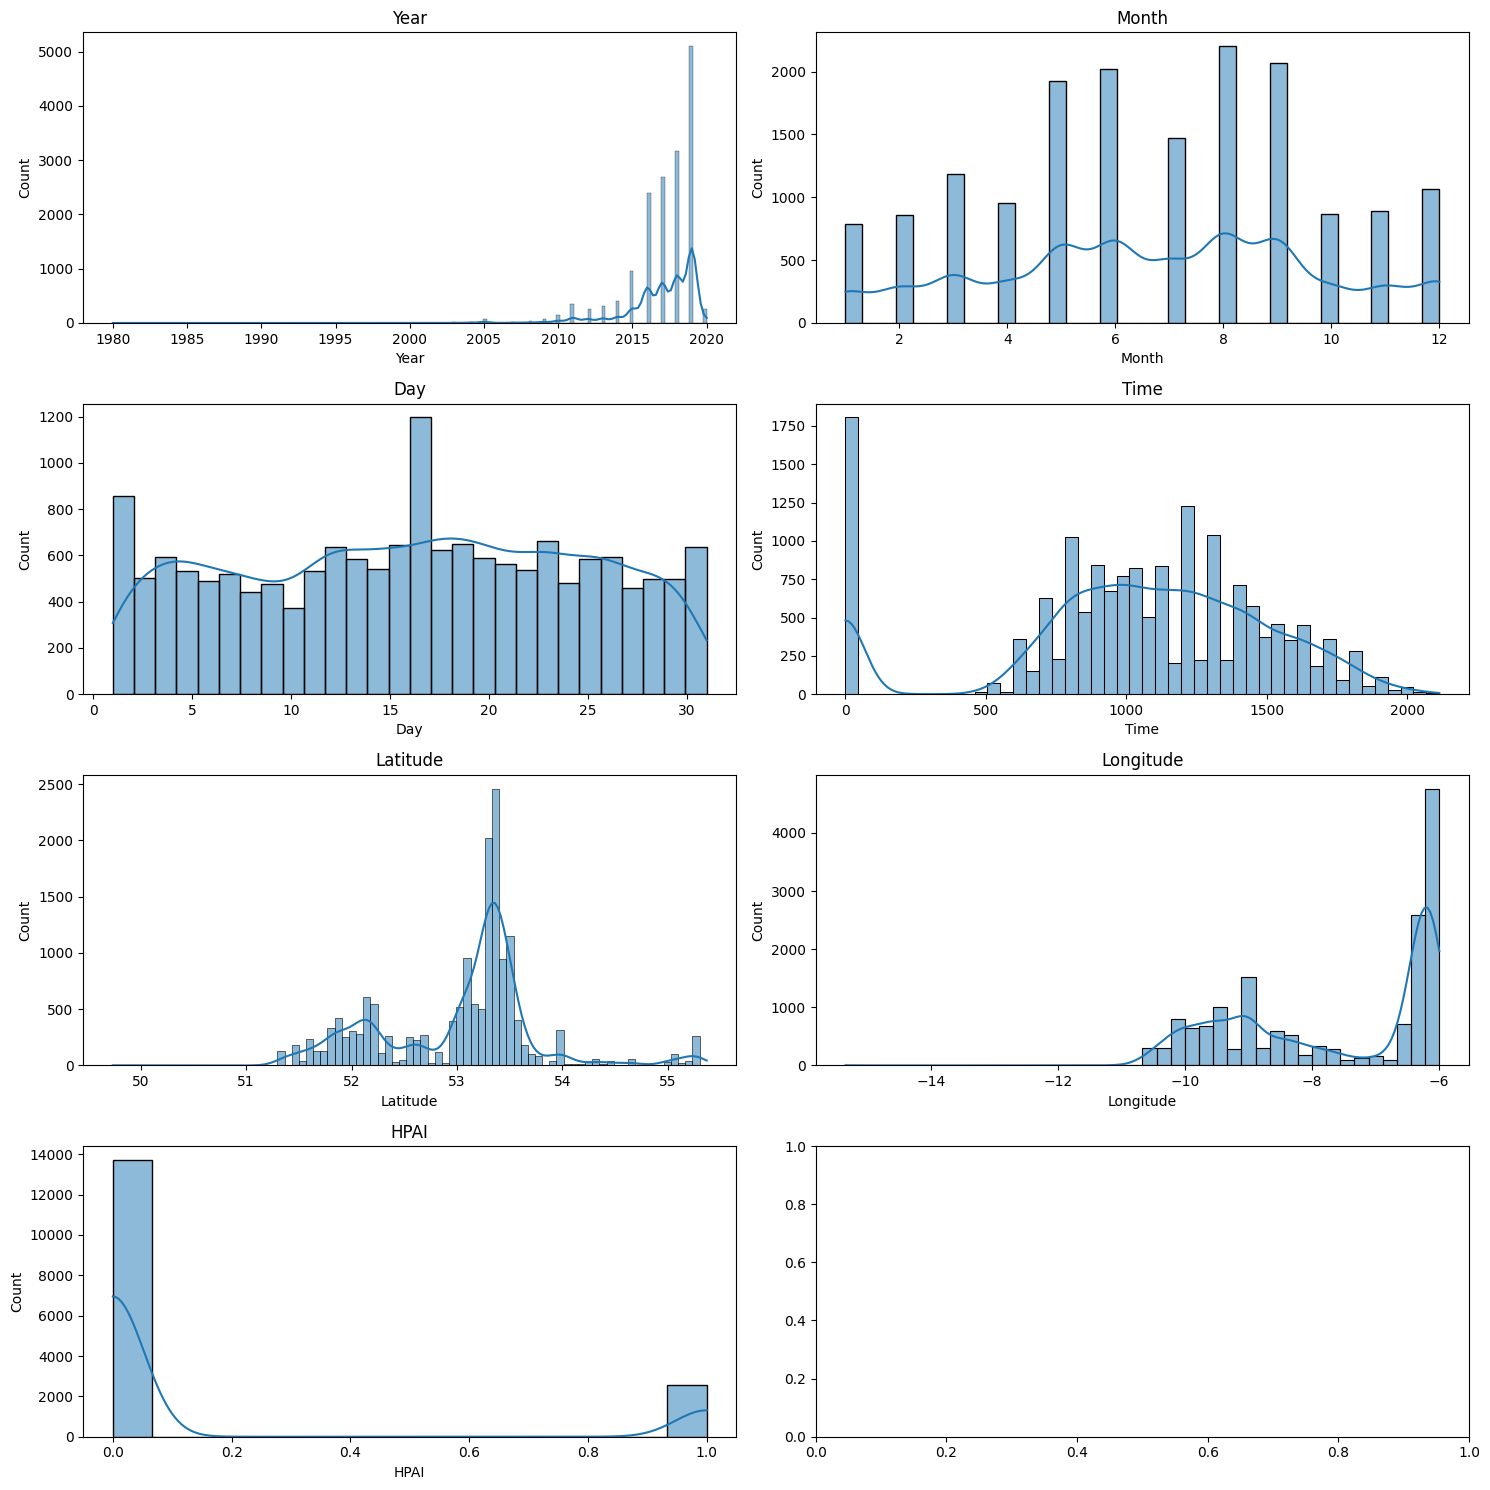

In [16]:
f, ax = plt.subplots(4,2 , figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols[1:8]):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

**HPAI Counting**

In [17]:
HPAI = df.groupby(['HPAI']).size().reset_index(name='count')

In [18]:
px.bar(HPAI, x='HPAI', y='count', barmode = 'group', title = 'HPAI Counting', text_auto = True, template='plotly_dark')

----------

**Latitude & Longtitude Change**

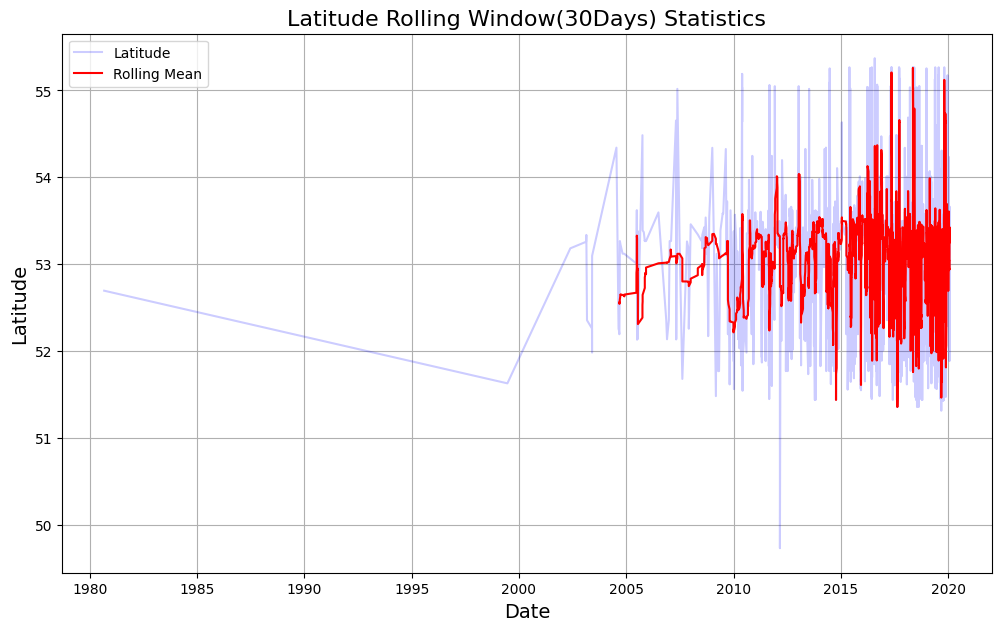

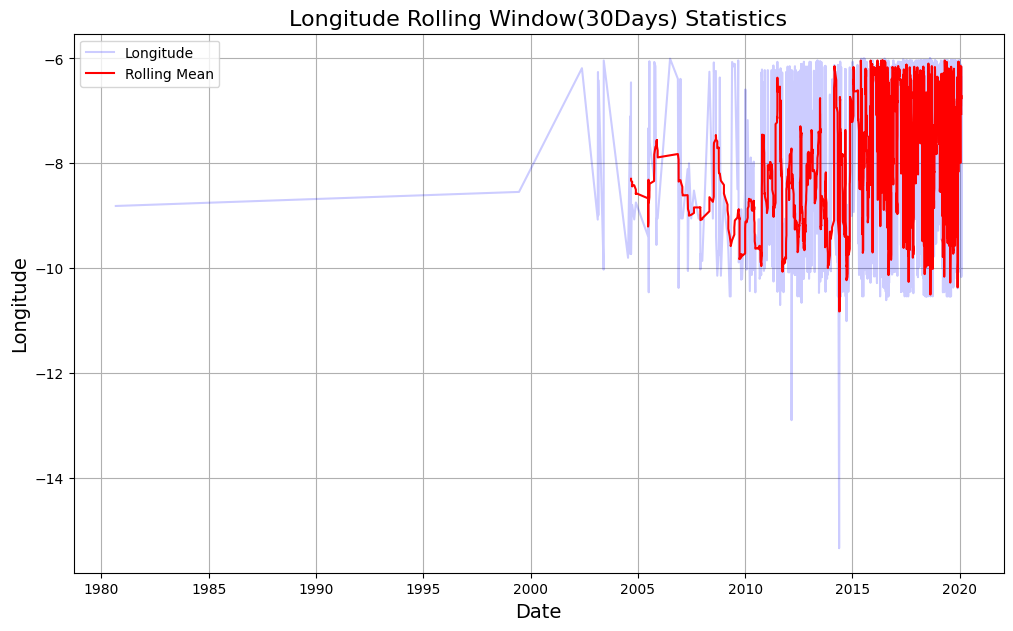

In [19]:
for index, cols in enumerate(num_cols[5:7]):
    rolling_mean = df[cols].rolling(window=30).mean()
    plt.figure(figsize=(12,7))
    
    plt.plot(df['Date'], df[cols] , label= cols, color='blue' , alpha = 0.2)
    plt.plot(df['Date'], rolling_mean, label= 'Rolling Mean', color='red')
    plt.title(f'{cols} Rolling Window(30Days) Statistics', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(cols, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

-------------

**HPAI by County**

In [20]:
HPAI_County = df.groupby(['HPAI','County']).size().reset_index(name='count')
HPAI_County['HPAI'] = HPAI_County['HPAI'].astype(str)

In [21]:
HPAI_County

,HPAI,County,count
0,0,Carlow,13
1,0,Cavan,7
2,0,Clare,906
3,0,Cork,1117
4,0,Donegal,525
5,0,Dublin,4015
6,0,Galway,2108
7,0,Kerry,1254
8,0,Kildare,59
9,0,Kilkenny,84


In [22]:
px.bar(HPAI_County, x= 'County' , y='count', color = 'HPAI', barmode= 'group' ,text_auto = True, title = 'HPAI by County')

---------

# **4. Modeling**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [24]:
df.head(2)

,_id,Scientific_Name,Common_Name,Date,Year,Month,Day,Time,Country,Country_State_County,State,County,Locality,Latitude,Longitude,Parent_Species,HPAI
3382,3383,Corvus monedula,Eurasian Jackdaw,1980-09-01,1980,9,1,800,Ireland,IE-M-CE,Munster,Clare,"Bunratty Castle, Bunratty, Ireland",52.6963,-8.8153,Corvus monedula,0
879,880,Uria aalge,Common Murre,1999-06-18,1999,6,18,1400,Ireland,IE-M-CK,Munster,Cork,Old Head of Kinsale,51.6305,-8.5470,Uria aalge,0


In [40]:
df.drop(columns = {'County','_id','Common_Name'}, axis = 1,inplace = True)

In [41]:
df = df.dropna()

In [42]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns

In [43]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [44]:
X = df.drop(columns=['HPAI'])
y = df['HPAI']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, svc, abc, gbc, lgr, xgb]

names = ["Random Forest", "Support Vector Machine", "Ada Boost",
        "Gradient Boostng", "Logistic Regression", "XGBoost"]

Random Forest accuracy: 0.9849
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2731
           1       0.98      0.92      0.95       504

    accuracy                           0.98      3235
   macro avg       0.98      0.96      0.97      3235
weighted avg       0.98      0.98      0.98      3235



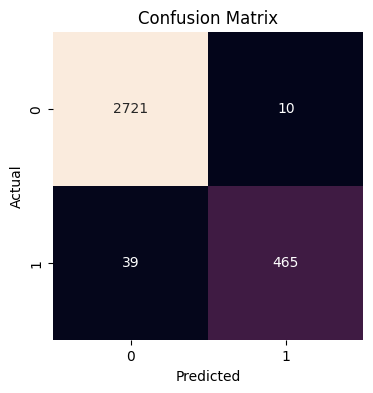

--------------------------------------------------
Support Vector Machine accuracy: 0.8442
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2731
           1       0.00      0.00      0.00       504

    accuracy                           0.84      3235
   macro avg       0.42      0.50      0.46      3235
weighted avg       0.71      0.84      0.77      3235



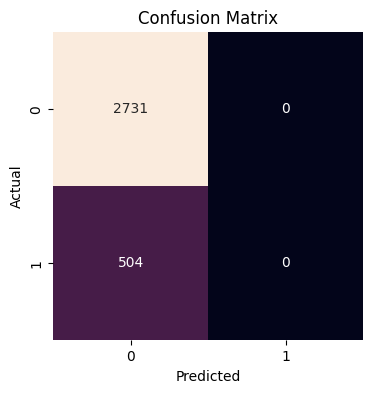

--------------------------------------------------
Ada Boost accuracy: 0.9104
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2731
           1       0.86      0.51      0.64       504

    accuracy                           0.91      3235
   macro avg       0.89      0.75      0.79      3235
weighted avg       0.91      0.91      0.90      3235



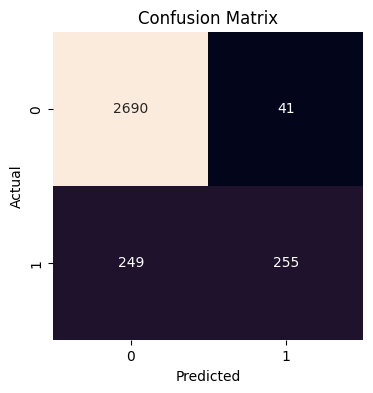

--------------------------------------------------
Gradient Boostng accuracy: 0.9849
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2731
           1       0.98      0.92      0.95       504

    accuracy                           0.98      3235
   macro avg       0.98      0.96      0.97      3235
weighted avg       0.98      0.98      0.98      3235



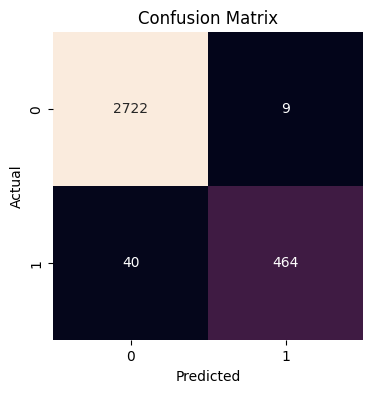

--------------------------------------------------
Logistic Regression accuracy: 0.843
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2731
           1       0.33      0.01      0.02       504

    accuracy                           0.84      3235
   macro avg       0.59      0.50      0.47      3235
weighted avg       0.77      0.84      0.77      3235



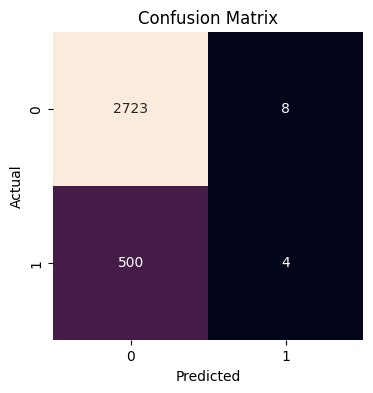

--------------------------------------------------
XGBoost accuracy: 0.9923
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2731
           1       0.97      0.99      0.98       504

    accuracy                           0.99      3235
   macro avg       0.98      0.99      0.99      3235
weighted avg       0.99      0.99      0.99      3235



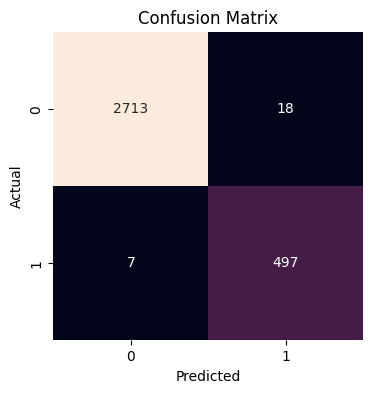

--------------------------------------------------


In [47]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

# **5. Evaluation**

In [48]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100

In [49]:
acc_df

,Model,Accuracy
0,Random Forest,98.485317
1,Support Vector Machine,84.420402
2,Ada Boost,91.035549
3,Gradient Boostng,98.485317
4,Logistic Regression,84.296754
5,XGBoost,99.227202


In [50]:
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

**XGBoost is BestModel**

-------

**Please leave your advice in the comments. Thank you**